In [40]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import avro.schema
from avro.datafile import DataFileReader
from avro.io import DatumReader
import pandas as pd
from datetime import datetime
import pytz


In [41]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr/sub-2/session-4.csv')


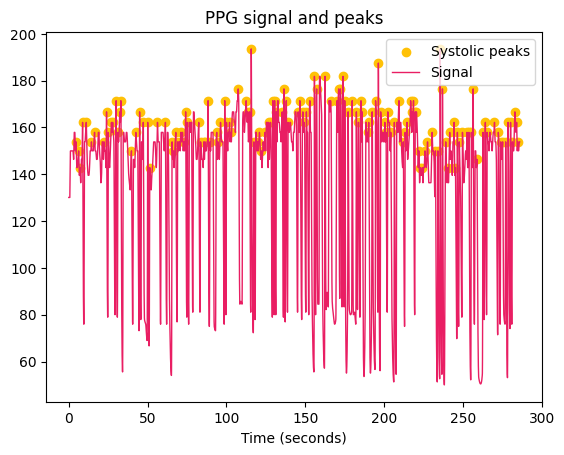

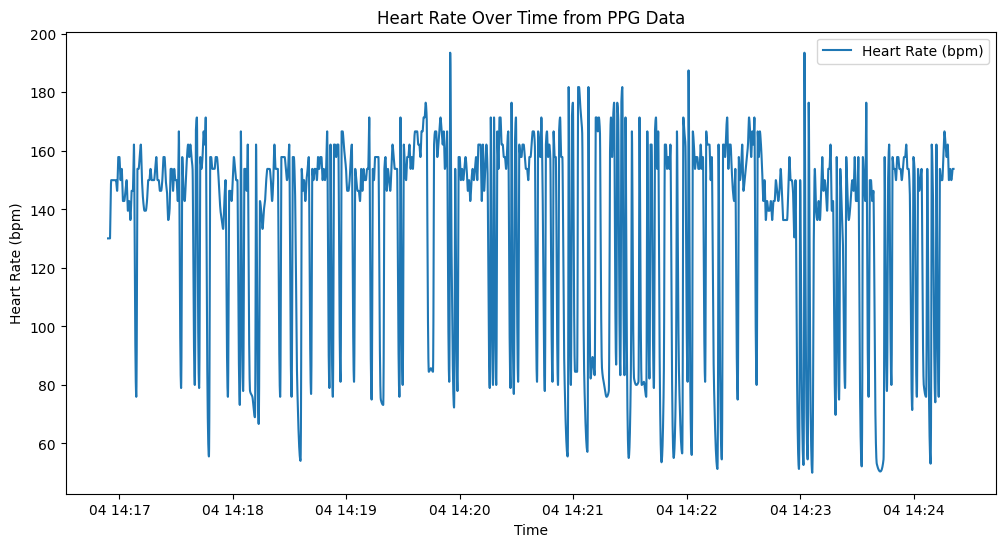

In [69]:
# Assume PPG data is sampled at 100 Hz (adjust if needed)
sampling_rate = 100  # Hz

# Process the PPG signal to identify peaks
ppg_cleaned = nk.ppg_clean(data['PPG_Raw'], sampling_rate=sampling_rate)
signals, info = nk.ppg_process(data['PPG_Raw'], sampling_rate=sampling_rate, method_quality='disimilarity')
peaks, info = nk.ppg_peaks(signals["PPG_Rate"], sampling_rate=100, method="elgendi", show=True)
quality = nk.ppg_quality(ppg_cleaned, sampling_rate=300, method="templatematch")
# Extract heart rate
heart_rate = signals["PPG_Rate"]  # Heart rate in bpm

# Add to DataFrame and plot
data['Heart_Rate'] = heart_rate

# Plot heart rate over time
plt.figure(figsize=(12, 6))
data['Timestamp']= pd.to_datetime(data['Timestamp_New'], utc=True)
plt.plot(data['Timestamp'], data['Heart_Rate'], label='Heart Rate (bpm)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Over Time from PPG Data')
plt.legend()
plt.show()

In [21]:
print (data['Heart_Rate'].mean())

132.79952239232543


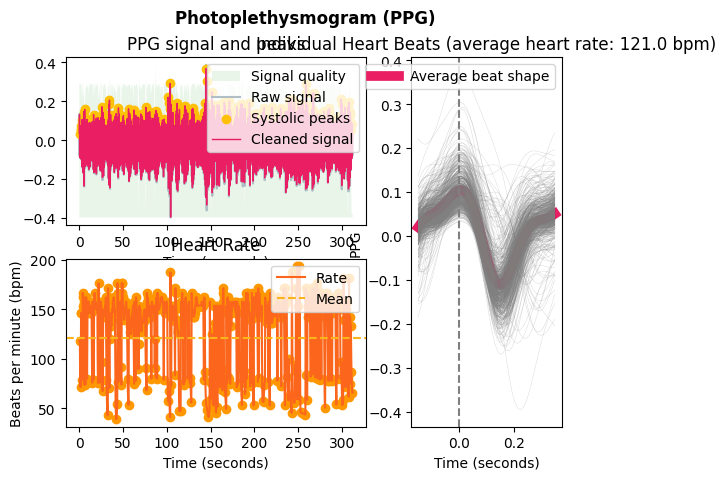

In [47]:
nk.ppg_plot(signals, info)

In [44]:
# print(type(signals))
print(signals.columns)
# print(data.columns)
# print(data['PPG_Rate'].mean())
# print(signals['PPG_Rate'].mean())

# Iterate over all columns in signals data frame and print the mean of the same columns from data and signals dataframe in the same line.
for column in signals.columns:
    print(column,data[column].mean(),signals[column].mean())

Index(['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Quality', 'PPG_Peaks'], dtype='object')
PPG_Raw -1.9516604687736356e-05 9.49053916914918e-06
PPG_Clean -4.277758153713836e-06 6.156658924537881e-06
PPG_Rate 0.9113271698079827 132.79952239232543
PPG_Quality -2.332531166085677 0.9525498088112824
PPG_Peaks 0.0 0.021637304250559285


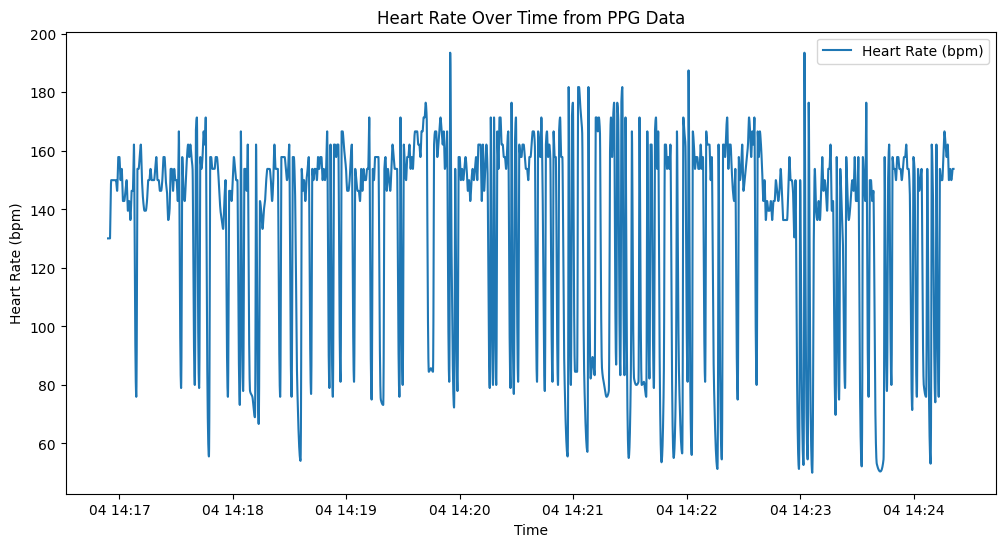

In [57]:
data = pd.read_csv('/Users/dhwanishah/Desktop/MS/VR-Dhwani/processed-hr/sub-2/session-4.csv')

# Plot heart rate over time
plt.figure(figsize=(12, 6))
data['Timestamp']= pd.to_datetime(data['Timestamp_New'], utc=True)
plt.plot(data['Timestamp'], data['PPG_Rate'], label='Heart Rate (bpm)')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate Over Time from PPG Data')
plt.legend()
plt.show()

In [45]:
import os
import pandas as pd
import neurokit2 as nk

# Define the input and output directories
input_dir = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr"  # Input directory containing subject folders
output_dir = "/Users/dhwanishah/Desktop/MS/VR-Dhwani/processed-hr"      # Output directory to save processed files

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Loop through each subject folder
for subject_folder in os.listdir(input_dir):
    subject_path = os.path.join(input_dir, subject_folder)
    
    if os.path.isdir(subject_path):  # Check if it's a directory
        # Create a corresponding folder in the output directory for the subject
        subject_output_path = os.path.join(output_dir, subject_folder)
        os.makedirs(subject_output_path, exist_ok=True)

        # Loop through each session file in the subject folder
        for session_file in os.listdir(subject_path):
            session_path = os.path.join(subject_path, session_file)
            
            if session_file.endswith('.csv'):  # Process only CSV files
                # Load the data
                data = pd.read_csv(session_path)

                # Clean the PPG signal
                sampling_rate = 100  # Adjust as necessary
                ppg_cleaned = nk.ppg_clean(data['PPG_Raw'], sampling_rate=sampling_rate)

                # Process the PPG signal
                signals, info = nk.ppg_process(ppg_cleaned, sampling_rate=sampling_rate)

                # Convert 'Timestamp' to UTC datetime
                data['Timestamp_New'] = pd.to_datetime(data['Timestamp'], utc=True)

                # Combine the new timestamp with the processed signals
                combined_data = pd.concat([
                    data['Timestamp_New'],
                    signals[['PPG_Raw', 'PPG_Clean', 'PPG_Rate', 'PPG_Quality', 'PPG_Peaks']]
                ], axis=1)

                # Save the combined data to a new CSV file in the processed folder
                output_file_path = os.path.join(subject_output_path, session_file)
                combined_data.to_csv(output_file_path, index=False)

print("Processing complete! The processed files are saved in the 'processed-hr' folder.")


Processing complete! The processed files are saved in the 'processed-hr' folder.


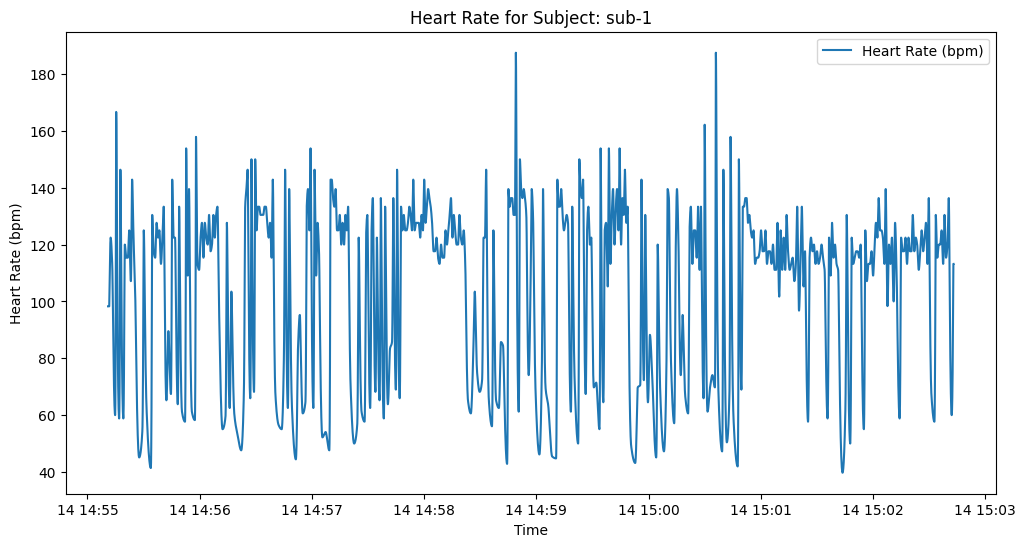

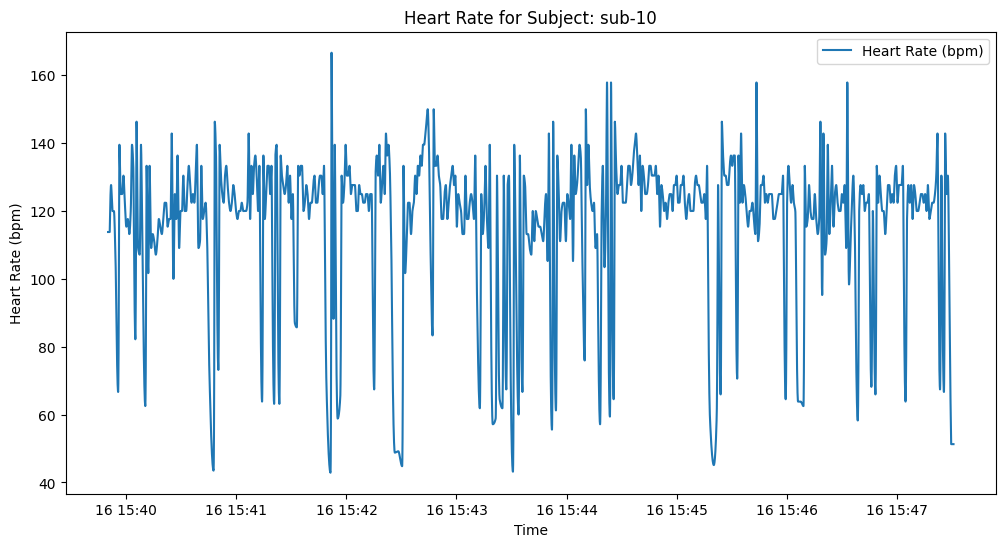

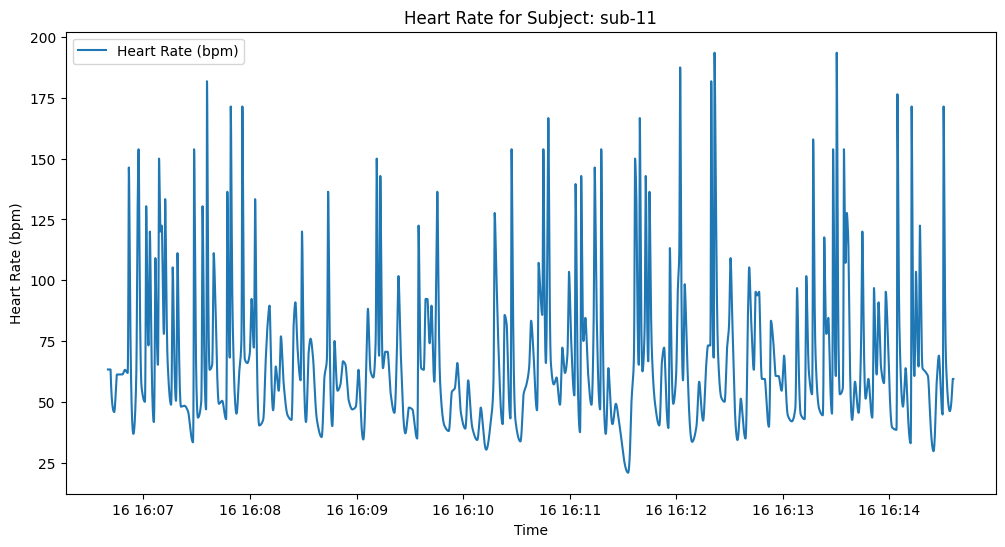

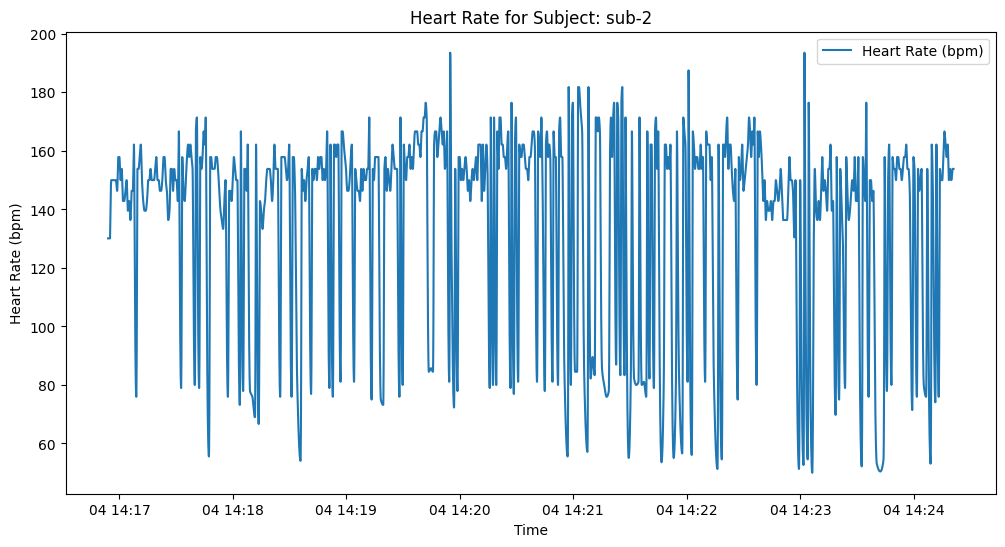

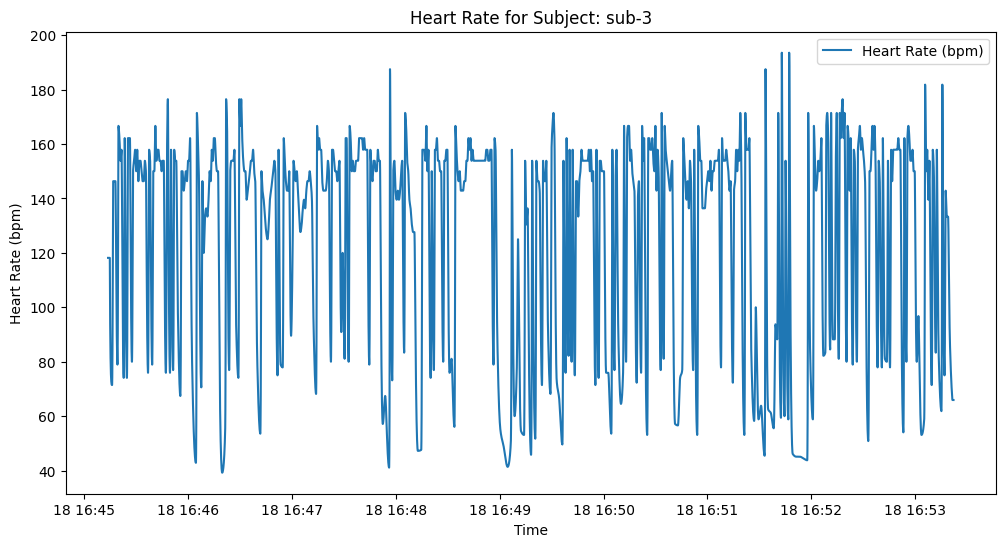

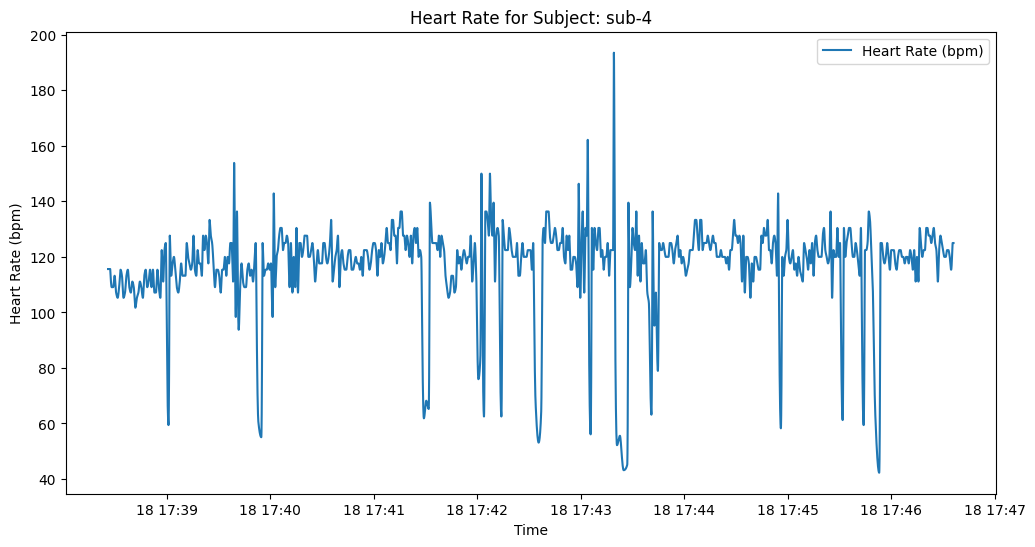

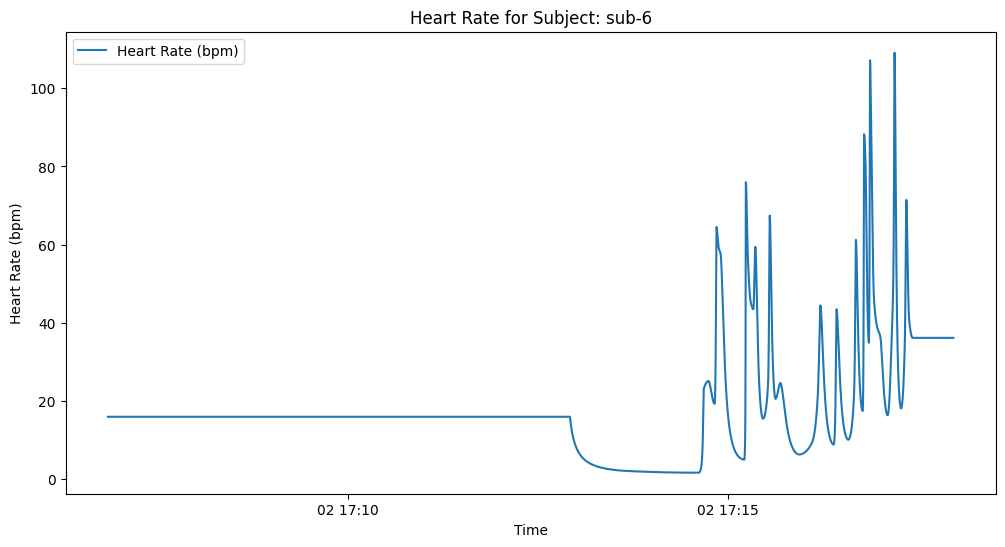

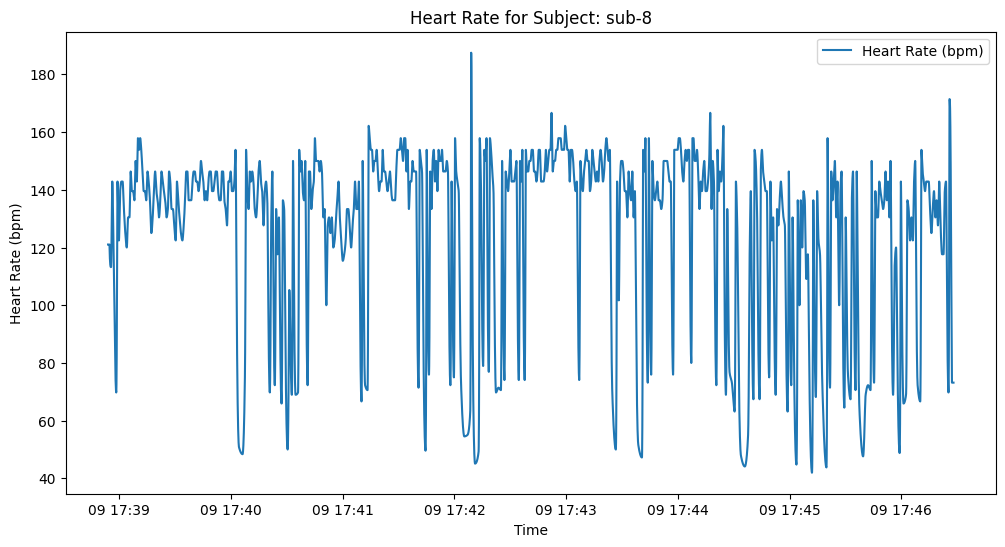

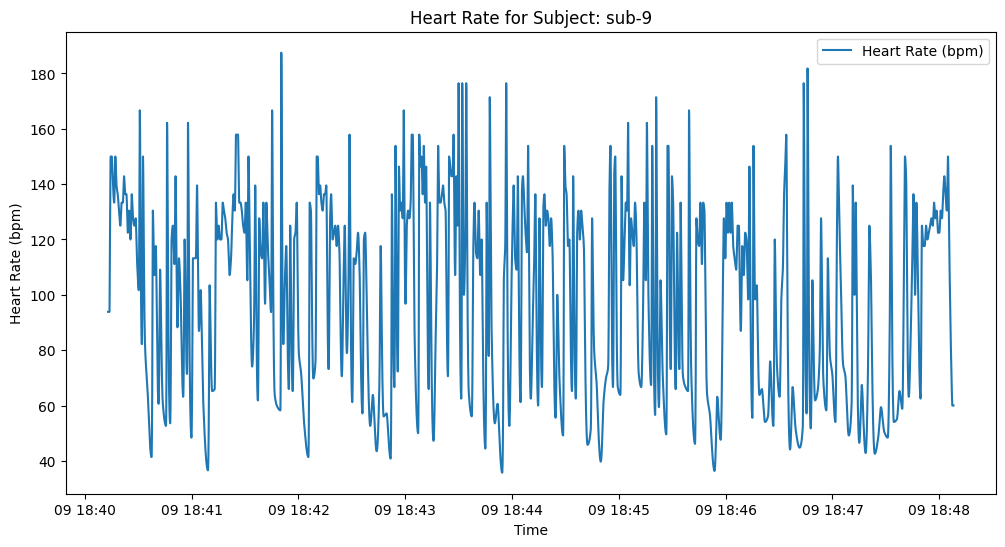

In [54]:

import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/processed-hr'

# Loop through subfolders
for sub_folder in sorted(os.listdir(base_dir)):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-4.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                data = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'timestamp' and 'EDA_Tonic'
                # x_data = df['Timestamp_New']
                # y_data = df['PPG_Rate']


                # Plot heart rate over time
                plt.figure(figsize=(12, 6))
                data['Timestamp']= pd.to_datetime(data['Timestamp_New'], utc=True)
                plt.plot(data['Timestamp'], data['PPG_Rate'], label='Heart Rate (bpm)')
                plt.xlabel('Time')
                plt.ylabel('Heart Rate (bpm)')
                plt.title(f'Heart Rate for Subject: {sub_folder}')
                plt.legend()
                plt.show()
                # Close the plot for next iteration
                plt.close()
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directories
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Define sessions and their labels
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

# Loop through each session and calculate means for PPG_Clean, PPG_Rate, and PPG_Quality
for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                
                # Calculate the mean values for PPG_Clean, PPG_Rate, and PPG_Quality
                mean_clean = df_session['PPG_Clean'].mean()
                mean_rate = df_session['PPG_Rate'].mean()
                mean_quality = df_session['PPG_Quality'].mean()

                # Store the means along with the subject ID
                session_means[session_name].append([sub_dir, mean_clean, mean_rate, mean_quality])

    # Convert list to DataFrame and name the columns
    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_clean', 'mean_rate', 'mean_quality'])

# Concatenate all sessions into one DataFrame
all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

# Order the subjects and fill missing values with the mean
subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_clean'].fillna(df_all_sessions['mean_clean'].mean(), inplace=True)
df_all_sessions['mean_rate'].fillna(df_all_sessions['mean_rate'].mean(), inplace=True)
df_all_sessions['mean_quality'].fillna(df_all_sessions['mean_quality'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])

# Melt the DataFrame for easier plotting (long format)
df_melted = pd.melt(df_all_sessions, id_vars=['subject', 'session'], value_vars=['mean_clean', 'mean_rate', 'mean_quality'], 
                    var_name='Metric', value_name='Value')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))

# Define labels for the x-axis
labels = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5a', 'Session 5b']

# Create the grouped bar plot using 'hue' to differentiate PPG_Clean, PPG_Rate, and PPG_Quality
sns.barplot(data=df_melted, x='session', y='Value', hue='Metric', palette=['#05ace8', '#1e226c', '#c53088'])
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Value \n', fontsize=14)
plt.tight_layout()
sns.despine()

# Uncomment below to save the figure
# plt.savefig(f"{fig_dir}/grouped-ppg-session-means.png", dpi=300)

plt.show()
print (df_all_sessions)